# Visualize the top 10 private companies (VNR500) in Vietnam 2014-2019

This workbook is aim to visualize the changes in the top 10 private companies in Vietnam regarding their revenue size, and revenue structure by industry between 2014-2019. The desired output for this notebook is to build two racing bar chart:

* Race bar chart of revenue from these 10 companies, color by their main revenue stream, between 2014-2019
* Race stacked bar chart of revenue (breakdown by industries) from these 10 companies between 2014-2019

## 1. Race barchart of revenue between the top 10 companies

In [1]:
# Loading libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting bar chart
import matplotlib.ticker as ticker # for customize the chart
import matplotlib.animation as animation # to add animation effect
from IPython.display import HTML # to save bar chart

# Input data: /kaggle/input/revenue-top10/VNR500 2014-2019.csv

# Loading dataset
df=pd.read_csv('/kaggle/input/revenue-top10/VNR500 2014-2019.csv')
## Format data columns
df.columns=[x.lower() for x in df.columns]
df=df.rename({'short-name': 'code', 'gross rev (bvnd)': 'rev'}, axis=1)
## Format data columns with number
df['rev']=df['rev'].map(lambda x: str(x).replace(',',''))
df['rev']=df['rev'].astype('float')
## Overview of data input
print('Industries represented by the top 10 throughout the years:\n', df['industry'].unique())
df.head()

Industries represented by the top 10 throughout the years:
 ['Real Estate' 'Retails' 'Gold and Gems trading'
 'Industrial Manufacturing' 'F&B' 'Aviation' 'Banking' 'Technology'
 'Energy' 'Construction']


,company,vn name,code,industry,rank,year,rev,source
0,VinGroup JSC,Tap Doan Vingroup - CTCP,VinGroup,Real Estate,1,2019,130000.0,Annual report
1,Mobile World Investment Corporation,CT CP Dau Tu The Gioi Di Dong,MWG,Retails,2,2019,103500.0,Consolidated FS
2,DOJI Gold and Gem Group JSC,CT CP Tap Doan Vang Bac Da Quy DOJI,DOJI,Gold and Gems trading,3,2019,89000.0,News outlet
3,Truong Hai Auto Corp.,CT CP Oto Truong Hai,Truong Hai,Industrial Manufacturing,4,2019,56550.0,Consolidated FS
4,Hoa Phat Group JSC.,CT CP Tap Doan Hoa Phat,Hoa Phat,Industrial Manufacturing,5,2019,63700.0,Consolidated FS


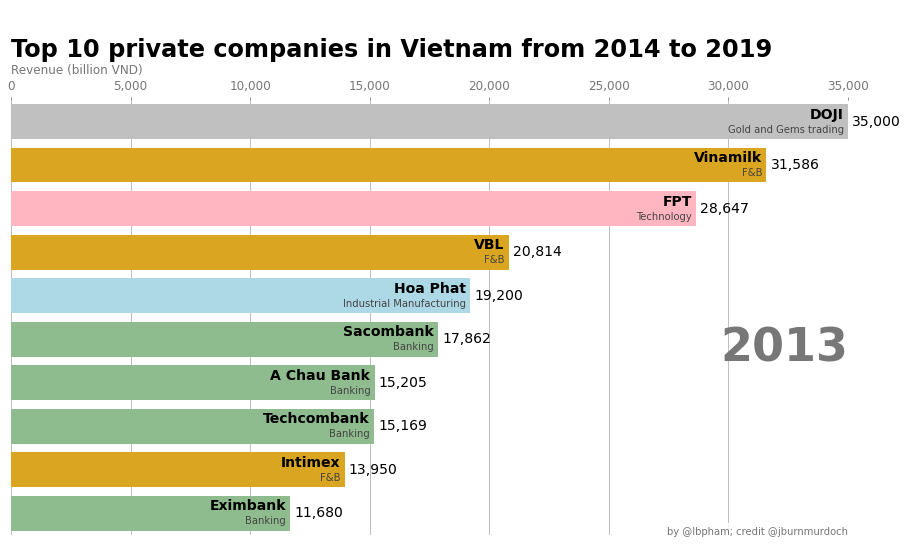

In [2]:
# Define the color dictionary for all bar charts
colorlist=['plum', 'salmon', 'silver', 'lightblue',
           'goldenrod', 'skyblue', 'darkseagreen','lightpink','gold','slategray']
colors = dict(zip(df['industry'].unique(),colorlist))
group_lk = df.set_index('code')['industry'].to_dict()

# Create function to draw the bar chart for each year
#fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(year):
    name='code'
    value='rev'
    cutoff='year'
    
    dff = df[df[cutoff].eq(year)].sort_values(by=value, ascending=True)
    ax.clear()
    ax.barh(dff[name], dff[value], color=[colors[group_lk[x]] for x in dff[name]])
    dx = dff[value].max() / 200
    for i, (value, name) in enumerate(zip(dff[value], dff[name])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Revenue (billion VND)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.10, 'Top 10 private companies in Vietnam from 2014 to 2019',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(0, 1.17, '   ',color='white',transform=ax.transAxes, size=24, ha='left')
    ax.text(1, 0, 'by @lbpham; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
# draw_barchart(2019) # draw to sample test the bar chart function

# Using the defined function above and animator to
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2013, 2020))
animator.save('bchart1.gif', writer='imagemagick', fps=1) # to save the output
HTML(animator.to_jshtml())

## 2. Race barchart of revenue (with breakdown by industry) of top 10 companies

In [3]:
# Input data: /kaggle/input/revenue-top10/VNR500 2014_2019_All.csv

# Loading dataset
dfa=pd.read_csv('/kaggle/input/revenue-top10/VNR500 2014_2019_All.csv')
## Format data columns
dfa.columns=[x.lower() for x in dfa.columns]
dfa=dfa.rename({'short-name': 'code'}, axis=1)
## Format data columns with number
dfa['rev']=dfa['rev'].map(lambda x: str(x).replace(',',''))
dfa['rev']=dfa['rev'].astype('float')
## Overview of data input
print('Industries represented by the top 10 throughout the years:\n', dfa['industry'].unique())
dfa.head()

Industries represented by the top 10 throughout the years:
 ['Real Estate' 'Hospitality' 'Retails' 'Other' 'Industrial Manufacturing'
 'Golds, silver and gems trading' 'F&B' 'Aviation' 'Financial Service'
 'Technology' 'Telecommunication']


,company,code,rank,year,industry,rev,revenue stream
0,VinGroup JSC,VinGroup,1,2019,Real Estate,64500.0,Sale of properties
1,VinGroup JSC,VinGroup,1,2019,Real Estate,6800.0,Lease of properties
2,VinGroup JSC,VinGroup,1,2019,Hospitality,8500.0,Hotel and amusement park
3,VinGroup JSC,VinGroup,1,2019,Retails,29700.0,Sale of goods in retail stores
4,VinGroup JSC,VinGroup,1,2019,Other,3000.0,Healthcare and related service


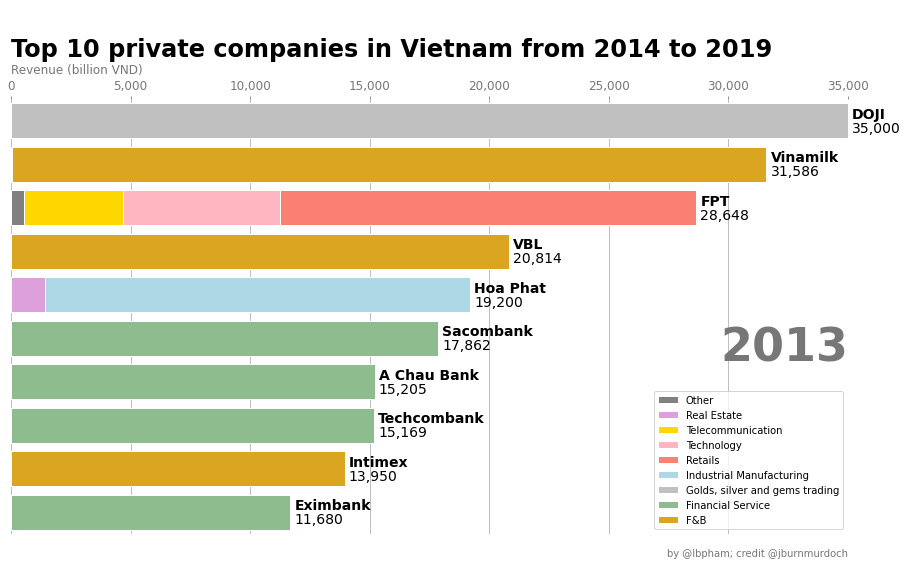

In [4]:
# Define the color dictionary for all bar charts
colorlist=['plum', 'slategray' ,'salmon', 'gray' ,'lightblue','silver',
           'goldenrod', 'skyblue', 'darkseagreen','lightpink','gold']
colors = dict(zip(dfa['industry'].unique(),colorlist))

def draw_stackbarchart(year):
    # Filter and proces data
    dftem = dfa.loc[dfa.year==year]
    summary=dftem.groupby(['code']).sum().sort_values(by='rev',ascending=True)

    # Transform data to plot
    listcom=dftem.groupby(['code']).sum().sort_values(by='rev',ascending=True).index
    listin=dftem.groupby(['industry']).sum().sort_values(by='rev',ascending=True).index
    dff = pd.DataFrame(index=listcom)
    for col in dftem['industry'].unique():
        dff = pd.merge(left=dff,right=dftem.loc[dftem.industry==col][['code','rev']].groupby(['code']).sum(),
                       left_index=True,right_index=True,how='left').rename({'rev': col},axis=1)
    dff=dff.fillna(0)
    
    # Plot the chart                                                       
    ax.clear()
    dx = summary['rev'].max() / 200
    
    ## Plot stack bar chart
    barWidth = 1
    bars=0
    for col in listin:
        ax.barh(dff.index, dff[col], color=colors[col], left=bars, edgecolor='white')
        bars = np.add(dff[col],bars).tolist()
    
    ## Adding label
    for i, (value, name) in enumerate(zip(summary['rev'], summary.index)):
        ax.text(value+dx, i,     name,           size=14, weight=600, ha='left', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='top')
    
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Revenue (billion VND)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.10, 'Top 10 private companies in Vietnam from 2014 to 2019',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(0, 1.17, '   ',color='white',transform=ax.transAxes, size=24, ha='left')
    ax.text(1, -0.05, 'by @lbpham; credit @jburnmurdoch', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    ax.legend(listin,loc=0)
    plt.box(False)

fig, ax = plt.subplots(figsize=(15, 8))    
draw_stackbarchart(2013)

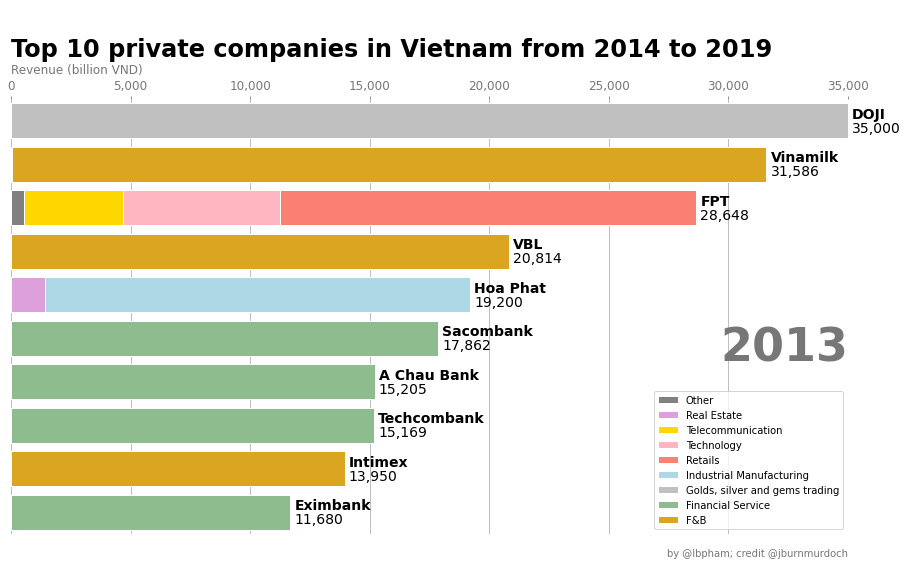

In [6]:
# Using the defined function above and animator to
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_stackbarchart, frames=range(2013, 2020))
animator.save('bchart2.gif', writer='imagemagick', fps=1)
HTML(animator.to_jshtml()) 
# or use animator.to_html5_video() or animator.save()